 # Doğrusal Olmayan Regrasyon 

# KNN En Yakın Komşu 

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

#Aldığımız kırmızı uyarılar görünmesin diye 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
knn_model= KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model
# KNN farklı komşuluk sayılarına göre farklı değerler verir. Bunu optimize edceğiz. 

KNeighborsRegressor()

In [5]:
knn_model.n_neighbors

5

In [6]:
knn_model.effective_metric_

'euclidean'

## KNN TAHMİN 

In [7]:
y_pred = knn_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

In [9]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## KNN model Tunning 

In [10]:
# GridSearchCV methodu ile optimum K belirleme işlemi 
from sklearn.model_selection import GridSearchCV

In [11]:
knn_params={"n_neighbors": np.arange(1,30,1)}
# 1 den 30 a kadar bak hangi komşu daha iyi bunu bul . 

In [12]:
knn=KNeighborsRegressor()

In [13]:
knn_cv_model= GridSearchCV(knn, knn_params, cv=10 )

In [14]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [15]:
# En uygun parametre değerini bulmak için 
knn_cv_model.best_params_["n_neighbors"]

8

In [16]:
# Valide edilmiş ve valide edilmemiş iki tane rmse değeri oluşturup gözmeleyelim.
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

# ilk değerler test ve train üzernden direk hesaplanmış , İkinci taraftakiler valide edilmiş değerlerle 
#hesaplanmış ve hepsi train hataları 
# RMSE_CV değerleri doğrulanmıştır. Modelimizin hatasını eğitim üzerinde alacağımız hata değerlendirmesini
#ve test hatasını mutlaka valide edilmiş model üzerinden değerlendir. 

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [17]:
# final modeli kuralım
knn_tuned = KNeighborsRegressor(n_neighbors= knn_cv_model.best_params_["n_neighbors"])

In [18]:
knn_tuned.fit(X_train,y_train)
# n_neighbors değeri 8 olarak geldi . 

KNeighborsRegressor(n_neighbors=8)

In [19]:
#Tune edilmiş modelin test hatasını hesaplama
np.sqrt(mean_squared_error(y_test,knn_tuned.predict(X_test))) 
# Tune edilmemiş test hatası 426 
# Tune edilmiş test hatası 413 
# yani tune ettiklten sonra test hatamız düştü. 

413.7094731463598

# SVR - Doğrusal

In [20]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [21]:
X_train= pd.DataFrame(X_train["Hits"])
X_test= pd.DataFrame(X_test["Hits"])

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
from sklearn.svm import SVR

In [24]:
svr_model= SVR( kernel="linear").fit(X_train, y_train)

In [25]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [26]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [27]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [28]:
-48.69756097561513 + 4.969512195122093 *91

# Çıkan denkleme Hits 1 değerimi yerleştirince tahmini arraydeki 1. değer geliyor. 

403.5280487804953

In [29]:
y_pred = svr_model.predict(X_train)

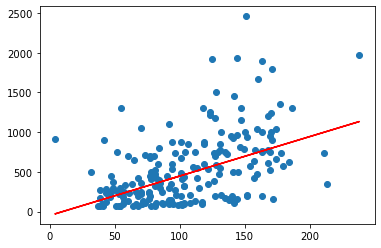

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="r");

In [31]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [32]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

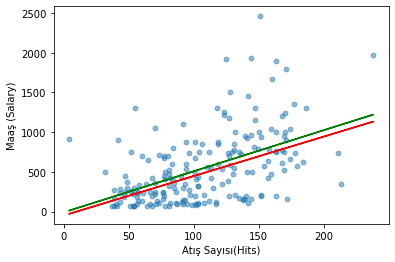

In [33]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

#SVR çizgisi (kırmızı) neden Linear model çizgisinden (yeşil) daha aşağıda?
#SVR aykırı gözlmelerden daha az etkilenir. Yani görselde göründüğü gibi yukarıda iki çok büyük değer var.
#Bu aykırı gözlmeler LM'i yukarı doğru çekmektedir. EKK(En Küçük Kareler) dolayı  
#Aykırı Gmzlemlerin etkisi SVRda daha düşük old. için çizgi daha aşağıdadır.

# SVR TAHMİN

In [34]:
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [35]:
svr_model.predict([[91]])

array([403.52804878])

In [36]:
y_pred= svr_model.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test,y_pred))
#Test hatası 459
#tune edilmemiş bir modeldir. 

459.0187960365147

# SVR Model Tunning 

In [38]:
#Tune etmemiz gereken C karmaşıklık parametresidir. 
svr_model

SVR(kernel='linear')

In [39]:
svr_params={"C": np.arange(0.1,2,0.1)}
svr_cv_model=GridSearchCV(svr_model,svr_params, cv= 10).fit(X_train,y_train)

In [40]:
#Bize önerdiği parametreyi inceleyelim. 
svr_cv_model.best_params_

{'C': 0.1}

In [41]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [42]:
# Final modeli oluşturalım. 
svr_tuned =SVR( kernel="linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)

In [43]:
y_pred= svr_tuned.predict(X_test)

In [44]:
#tune edilmiş modelde test hatasını hesaplama 
np.sqrt(mean_squared_error(y_test,y_pred))


458.198966781116

# Doğrusal Olmayan SVR 

In [45]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [46]:

from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR( kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

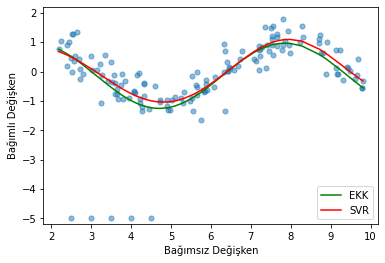

In [47]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [48]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [49]:
#Model kurma
svr_rbf= SVR( kernel="rbf").fit(X_train,y_train)

# Doğrusal Olmayan SVR Tahmin 

In [50]:
y_pred = svr_rbf.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred))

460.0032657244849

# Doğrusal Olmayan SVR Model Tunning 

In [52]:
svr_rbf
#C karmaşıklık parametresi bizim optimize etmemiz gereken parametremiz. 

SVR()

In [53]:
svr_params = {"C": [0.1,0.4,5,10,20,30,40,50]}
svr_cv_model= GridSearchCV(svr_rbf,svr_params, cv=10)
svr_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [54]:
svr_cv_model.best_params_

{'C': 50}

In [55]:
#Final Model
svr_tuned= SVR( kernel="rbf", C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)
svr_tuned

SVR(C=50)

In [56]:
y_pred = svr_tuned.predict(X_test)

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred))

428.00406888095694

# YAPAY SİNİR AĞLARI 

## YSA Model 

In [58]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [61]:
X_train_scaled= scaler.transform(X_train)

In [62]:
X_test_scaled= scaler.transform(X_test)

In [63]:
from sklearn.neural_network import MLPRegressor

In [64]:
#Model kurma
mlp_model=MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled,y_train)

In [65]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [66]:
mlp_model.n_layers_

4

## YSA Tahmin 

In [67]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 76.68572087, 306.96763895, 195.88793322,  66.08672499,
        43.12068647])

In [68]:
#Test Hata ızı hesaplayalım
y_pred= mlp_model.predict(X_test_scaled)

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred ))

495.7198500544745

## YSA Model Tunning 

In [70]:
mlp_params= {"alpha": [0.1,0.01,0.02,0.005],
            "hidden_layer_sizes": [(20,20),(100,50,150),(200,300,150)],
            "activation": ["relu","logistic"]}

In [71]:
mlp_cv_model= GridSearchCV(mlp_model,mlp_params,cv=10)

In [72]:
mlp_cv_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (200, 300, 150)]})

In [73]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

In [74]:
mlp_tuned = MLPRegressor(alpha=0.02, hidden_layer_sizes= (10,50,150))

In [75]:
mlp_tuned.fit(X_train_scaled, y_train )

MLPRegressor(alpha=0.02, hidden_layer_sizes=(10, 50, 150))

In [76]:
y_pred= mlp_tuned.predict(X_test_scaled)

In [77]:
np.sqrt(mean_squared_error(y_test, y_pred ))
#356en tune edilmiş modeller arasında en düşük test hatasını veren model YSA oldu

366.4483601462987

# Classification and Regression Trees (CART)

In [78]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [79]:
X_train= pd.DataFrame(X_train["Hits"])
X_test= pd.DataFrame(X_test["Hits"])

In [80]:
#Model kurma 
cart_model= DecisionTreeRegressor()

In [81]:
cart_model

DecisionTreeRegressor()

In [82]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

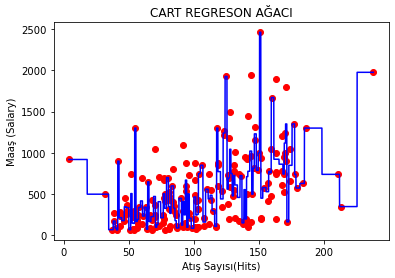

In [83]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [84]:
#Python a uyarlı Kural seti 

In [85]:
!pip install skompiler

  Using cached SKompiler-0.6.tar.gz (45 kB)
  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54287 sha256=1f245766f362d7e11f27520eb3593c8cd63bd1311df992147026193140eaab04
  Stored in directory: /home/gulce/.cache/pip/wheels/fd/94/33/2a75ac13109534426a0ace0cde02f41aef30a846f1facd4110
Successfully built skompiler


In [86]:
from skompiler import skompile

In [225]:
#print(skompile(cart_model.predict).to('python/code'))
# to çevir anlamındadır.

## CART Tahmin 

In [217]:
x=[91]

In [218]:
# Bu Python'a uyarlı Kural seti bir üstteki koddan gelmeliydi ama çalışmadı . 
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [219]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [220]:
cart_model.predict([[91]])

array([125.])

In [221]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.75341262795996

## CART Model Tunning 

In [107]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [ ]:
#CART GEÇİLDİ 

# Bagget Trees 

In [110]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [136]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [124]:
bag_model.n_estimators

10

In [125]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=817728167),
 DecisionTreeRegressor(random_state=1654094950),
 DecisionTreeRegressor(random_state=1723785543),
 DecisionTreeRegressor(random_state=1006339877),
 DecisionTreeRegressor(random_state=1928978852),
 DecisionTreeRegressor(random_state=2046184887),
 DecisionTreeRegressor(random_state=59988483),
 DecisionTreeRegressor(random_state=972223183),
 DecisionTreeRegressor(random_state=342389062),
 DecisionTreeRegressor(random_state=334795595)]

In [126]:
bag_model.estimators_samples_

[array([ 12, 183, 118, 137,  92, 177, 111, 109,  29,  84, 176, 131, 180,
        196, 102, 143, 166, 154,  78, 196, 160, 134,  16, 175,  24, 115,
          9,   0, 116,  25,  36,  30, 135, 119, 178, 134,  47, 120, 195,
        188, 144,  44, 180,  45, 161, 114,  77,  49, 131, 183,   4, 146,
          8,  84, 164, 145,  72,  54, 120, 168,  75,  90, 169, 117,  21,
        191, 167, 173,  40, 133,  48, 167,  21,  78,  63,   3,  57,  79,
        173, 109,  87,  47,  73,  56, 143,  39, 130,  68, 102,  19, 155,
        133, 134,  72,  22,  89,  93, 163,  98, 187, 182,  90,   3,  34,
         45, 176, 119,  73,  52,   8, 145, 171, 120,  20,  34,  97, 158,
        174, 190,  69,  77, 177,  70, 131, 189,  89, 185,   5,  34, 125,
        115,   1, 133,   6, 173,  98, 176,  13,  18, 157, 138, 124,  81,
        185, 130, 108,  67,   7,  97,  88, 156,  46, 127, 149,  68,  93,
        189,  19, 146,  95, 168,  51, 184,  76, 120,  77,  78, 141,  22,
        169, 145, 153,  54, 174, 137,  49, 106, 111

In [127]:
bag_model.estimators_features_

[array([ 7,  3, 11,  0,  9,  2,  9,  1, 12, 16, 18, 11,  9, 15,  1, 13, 16,
         3, 14]),
 array([ 6,  2, 15, 18,  9,  2, 11,  4,  5, 13, 10, 13,  4, 13,  1,  0,  6,
         6, 17]),
 array([ 7, 17,  9,  9,  0,  8, 12,  8, 13, 16, 13, 10,  3,  8, 11, 16, 13,
         3,  8]),
 array([ 5,  1,  5,  4, 13, 14,  1,  5,  1,  7, 12,  6, 14, 16, 16,  8,  6,
         0,  8]),
 array([ 4, 16,  3, 11, 14, 18, 15,  8, 10,  0,  0,  0,  9,  4,  6, 12, 11,
         4,  5]),
 array([18,  3, 10,  1, 15,  0, 10,  0,  5, 13, 15,  2,  8,  6,  3, 11,  3,
        10,  5]),
 array([ 3,  4, 13,  3, 16,  2,  0, 11, 13,  5, 10, 13, 17,  5,  4, 17, 17,
        12, 13]),
 array([15, 14,  8, 16,  6,  0,  0, 11,  8,  1, 15, 16,  7,  8, 18,  8, 13,
         4,  5]),
 array([ 6, 18, 16,  5, 17, 17,  5,  7, 18,  0, 14,  7, 13,  8,  4, 15, 16,
         0, 16]),
 array([11,  5, 12,  2, 11, 18, 13, 15,  5, 10, 10, 17, 18,  7,  9, 16, 11,
        18, 17])]

In [128]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=1654094950)

# BAGGET Tahmin 

In [129]:
y_pred= bag_model.predict(X_test)

In [130]:
np.sqrt(mean_squared_error(y_test, y_pred))
# tüm ağaçların ortak tahmini 

395.4260167384167

In [131]:
# Ağaçların kendilerine erişmek 
iki_y_pred= bag_model.estimators_[1].fit(X_train,y_train).predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

533.37955548986

In [134]:
yedi_y_pred= bag_model.estimators_[6].fit(X_train,y_train).predict(X_test)

In [135]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

451.9183560214906

## BAGGET Model Tunning 

In [137]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [138]:
bag_params= {"n_estimators": range(2,20)}

In [139]:
bag_cv_model= GridSearchCV(bag_model, bag_params)

In [140]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [141]:
bag_cv_model.best_params_

{'n_estimators': 15}

In [142]:
bag_tuned= BaggingRegressor(n_estimators=15, random_state=45)

In [143]:
bag_tuned.fit(X_train,y_train)

BaggingRegressor(n_estimators=15, random_state=45)

In [146]:
y_pred = bag_tuned.predict(X_test)

In [147]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.0234848615451

## Random Forest Model

In [148]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf_model= RandomForestRegressor(random_state=42)

In [151]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

## RF Tahmin

In [154]:
rf_model.predict(X_test)[0:5]

array([ 740.62167,  895.99497, 1184.695  ,  139.65167,  634.75833])

In [155]:
y_pred= rf_model.predict(X_test)

In [156]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

## RF Model Tunnig

In [157]:
rf_params= {"max_depth": list(range(1,10)),
           "max_features": [3,5,10,15],
           "n_estimators": [100,200,500,1000]}
#n_estimators için en iyi çalıştığı düşünülen sayılar 500 ve 1000'dir.

In [158]:
rf_model= RandomForestRegressor(random_state = 42)

In [159]:
rf_cv_model= GridSearchCV(rf_model,rf_params,cv=10, n_jobs=-1)
#hızlı çalışmayı sağlar

In [160]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000]})

In [165]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 100}

In [166]:
rf_tuned= RandomForestRegressor(max_depth= 8, max_features= 3, n_estimators= 100)

In [168]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=3)

In [169]:
y_pred= rf_tuned.predict(X_test)

In [171]:
np.sqrt(mean_squared_error(y_test,y_pred))

341.92587510276394

In [172]:
#değişkenlerin önem düzeylerine erişmek gibi bir ihtiyacımız old düşünüleim
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index= X_train.columns)

Text(0.5,0,'Değişkenlerin Önem Düzeyleri')

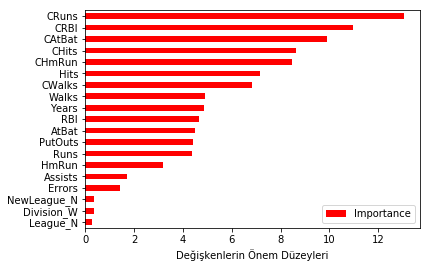

In [175]:
Importance.sort_values(by="Importance" , axis=0 ,ascending=True).plot(kind="barh", color="r")
plt.xlabel("Değişkenlerin Önem Düzeyleri")

# GBM Model 

In [176]:
from sklearn.ensemble import GradientBoostingRegressor

In [178]:
gbm_model= GradientBoostingRegressor()
gbm_model.fit(X_train,y_train)

GradientBoostingRegressor()

## GBM TAHMİN 

In [179]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

358.063784406338

## GBM Model Tunning 

In [180]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [182]:
gbm= GradientBoostingRegressor()
gbm_cv_model= GridSearchCV(gbm,gbm_params, cv=10,n_jobs=-1, verbose= 2 )
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [188]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.75}

In [189]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [190]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

334.8671859231009

In [191]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5,0,'Değişken Önem Düzeyleri')

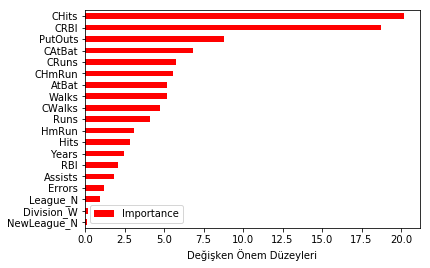

In [192]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## XGBoots Model

In [193]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [87]:
!pip install xgboost

  Using cached xgboost-1.5.1-py3-none-manylinux2014_x86_64.whl (173.5 MB)


In [88]:
import xgboost as xgb 

In [89]:
# pandas yerine xgbootsun kendi veri yapısını kullanırsak daha doğru çıktılar elde ederiz. 
DM_train= xgb.DMatrix(data= X_train, label=y_train)
DM_test= xgb.DMatrix(data= X_test, label=y_test)

In [90]:
from xgboost import XGBRegressor

In [ ]:
#model kurma
xgb_model= XGBRegressor().fit(X_train,y_train)

## XGB Tahmin

In [204]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## XGB Model Tunning 

In [205]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [209]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


In [ ]:
xgb_cv.best_params_

In [ ]:
# Final - tune edilmiş model oluşturma 

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Light GBM Model 

In [18]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [91]:
!pip install lightgbm

  Using cached lightgbm-3.3.1-py3-none-manylinux1_x86_64.whl (2.0 MB)


In [92]:
from lightgbm import LGBMRegressor

In [21]:
#conda install -c conda-forge lightgbm

SyntaxError: invalid syntax (<ipython-input-21-8a58c9ad6fe6>, line 1)

In [93]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [26]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [94]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 22 kB/s  eta 0:00:01     |████▎                           | 10.3 MB 3.1 MB/s eta 0:00:22     |████████                        | 18.9 MB 1.4 MB/s eta 0:00:42     |██████████████▋                 | 34.8 MB 2.9 MB/s eta 0:00:15     |██████████████▉                 | 35.2 MB 2.9 MB/s eta 0:00:14     |██████████████▉                 | 35.5 MB 2.9 MB/s eta 0:00:14     |████████████████▉               | 40.1 MB 2.4 MB/s eta 0:00:16     |██████████████████▋             | 44.4 MB 2.2 MB/s eta 0:00:15     |███████████████████▉            | 47.2 MB 2.1 MB/s eta 0:00:14     |███████████████████████         | 54.6 MB 2.0 MB/s eta 0:00:12     |███████████████████████▍        | 55.9 MB 2.0 MB/s eta 0:00:11
     |████████████████████████████████| 26.5 MB 1.8 MB/s eta 0:00:01    |████████▌                       | 7.1 MB 2.8 MB/s eta 0:00:08     |██████████                      | 8.4 MB 3.4 MB/s eta 0:00:06     |█████████████████████▏          | 17.5 MB 3.

In [95]:
!pip install numpy==1.16.1

     |████████████████████████████████| 5.1 MB 959 kB/s eta 0:00:01     |█████████                       | 1.4 MB 811 kB/s eta 0:00:05     |██████████████████▌             | 2.9 MB 811 kB/s eta 0:00:03��██▋          | 3.4 MB 959 kB/s eta 0:00:02
  ERROR: Command errored out with exit status 1:
   command: /home/gulce/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-yrocl33k/numpy_487c9af5cbe94125bf2f22d4a3b8fa7c/setup.py'"'"'; __file__='"'"'/tmp/pip-install-yrocl33k/numpy_487c9af5cbe94125bf2f22d4a3b8fa7c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-srdgjgbq
       cwd: /tmp/pip-install-yrocl33k/numpy_487c9af5cbe94125bf2f22d4a3b8fa7c/
  Complete output (2877 lines):
  Running f

In [96]:
from catboost import CatBoostRegressor

In [97]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 441.4961324	total: 46ms	remaining: 46s
1:	learn: 437.9873259	total: 46.7ms	remaining: 23.3s
2:	learn: 434.1507640	total: 47.2ms	remaining: 15.7s
3:	learn: 431.0240626	total: 47.6ms	remaining: 11.8s
4:	learn: 428.2297295	total: 48.4ms	remaining: 9.64s
5:	learn: 425.3570386	total: 49.4ms	remaining: 8.19s
6:	learn: 422.6244645	total: 50.8ms	remaining: 7.21s
7:	learn: 419.9874827	total: 51.3ms	remaining: 6.36s
8:	learn: 417.6407599	total: 51.8ms	remaining: 5.7s
9:	learn: 415.1051813	total: 52.3ms	remaining: 5.17s
10:	learn: 413.1276967	total: 52.8ms	remaining: 4.74s
11:	learn: 410.6678868	total: 53.2ms	remaining: 4.38s
12:	learn: 408.6757418	total: 53.7ms	remaining: 4.07s
13:	learn: 406.6158944	total: 54.1ms	remaining: 3.81s
14:	learn: 404.6180363	total: 54.6ms	remaining: 3.58s
15:	learn: 402.8324485	total: 55ms	remaining: 3.38s
16:	learn: 401.0009507	total: 55.6ms	remaining: 3.22s
17:	learn: 399.5833881	total: 56.1ms	remaining: 3.06s
18:	learn: 397.

## Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [98]:
!pip install lightgbm

In [99]:
from lightgbm import LGBMRegressor

In [ ]:
#conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [100]:
!pip install catboost

In [101]:
from catboost import CatBoostRegressor

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [102]:
!pip install lightgbm

In [103]:
from lightgbm import LGBMRegressor

In [ ]:
#conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [10]:
!pip install catboost

In [11]:
from catboost import CatBoostRegressor

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [12]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

In [14]:
#conda install -c conda-forge lightgbm

SyntaxError: invalid syntax (<ipython-input-14-1139cc5c6a5e>, line 1)

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
lgbm_model

In [ ]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [15]:
!pip install catboost

In [16]:
from catboost import CatBoostRegressor

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [ ]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

## Tahmin

In [ ]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

## Model Tuning

In [ ]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [ ]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# en iyi sonuç GBM alg çıktı 